In [86]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 1
from nltk.corpus import gutenberg

# 2
from nltk.tokenize import word_tokenize, sent_tokenize

# 3
from nltk.corpus import stopwords

# 4
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# 5
from nltk import pos_tag

# 6
from nltk import ne_chunk
from nltk.tree import Tree



In [87]:
# 2
# Prepare 
words_list = gutenberg.words ("shakespeare-hamlet.txt")
words_str = ""
for j in words_list:
    words_str += j + " "

# Tokenize

words_no_filter = word_tokenize (words_str)
sents = sent_tokenize (words_str)
sents [:5]

['[ The Tragedie of Hamlet by William Shakespeare 1599 ] Actus Primus .',
 'Scoena Prima .',
 'Enter Barnardo and Francisco two Centinels .',
 'Barnardo .',
 "Who ' s there ?"]

In [88]:
# 2.5
def isword (string):
    for char in string:
        if ord (char.lower()) < 97:
            return False
        elif ord (char.lower ()) > 122:
            return False
    return True

words = list (filter (isword, words_no_filter))

In [89]:
# 3 remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
print("Filtered Words:", filtered_words [:10])

Filtered Words: ['Tragedie', 'Hamlet', 'William', 'Shakespeare', 'Actus', 'Primus', 'Scoena', 'Prima', 'Enter', 'Barnardo']


In [90]:
# 4 Stemming and Lemmatization

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
print("Stemmed Words:", stemmed_words[:10])

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("Lemmatized Words:", lemmatized_words[:10])

Stemmed Words: ['tragedi', 'hamlet', 'william', 'shakespear', 'actu', 'primu', 'scoena', 'prima', 'enter', 'barnardo']
Lemmatized Words: ['Tragedie', 'Hamlet', 'William', 'Shakespeare', 'Actus', 'Primus', 'Scoena', 'Prima', 'Enter', 'Barnardo']


In [91]:
# 5 POS

pos_tags = pos_tag(words)
print("POS Tags:", pos_tags)
POS_hist = np.array ([k[1] for k in pos_tags])

POS Tags: [('The', 'DT'), ('Tragedie', 'NNP'), ('of', 'IN'), ('Hamlet', 'NNP'), ('by', 'IN'), ('William', 'NNP'), ('Shakespeare', 'NNP'), ('Actus', 'NNP'), ('Primus', 'NNP'), ('Scoena', 'NNP'), ('Prima', 'NNP'), ('Enter', 'NNP'), ('Barnardo', 'NNP'), ('and', 'CC'), ('Francisco', 'NNP'), ('two', 'CD'), ('Centinels', 'NNP'), ('Barnardo', 'NNP'), ('Who', 'NNP'), ('s', 'VBP'), ('there', 'EX'), ('Fran', 'NNP'), ('Nay', 'NNP'), ('answer', 'IN'), ('me', 'PRP'), ('Stand', 'NNP'), ('vnfold', 'VB'), ('your', 'PRP$'), ('selfe', 'JJ'), ('Bar', 'NNP'), ('Long', 'NNP'), ('liue', 'VBD'), ('the', 'DT'), ('King', 'NNP'), ('Fran', 'NNP'), ('Barnardo', 'NNP'), ('Bar', 'NNP'), ('He', 'PRP'), ('Fran', 'NNP'), ('You', 'PRP'), ('come', 'VBP'), ('most', 'RBS'), ('carefully', 'RB'), ('vpon', 'VB'), ('your', 'PRP$'), ('houre', 'NN'), ('Bar', 'NNP'), ('Tis', 'NNP'), ('now', 'RB'), ('strook', 'VBZ'), ('twelue', 'JJ'), ('get', 'VB'), ('thee', 'JJ'), ('to', 'TO'), ('bed', 'VB'), ('Francisco', 'NNP'), ('Fran', 'NNP'

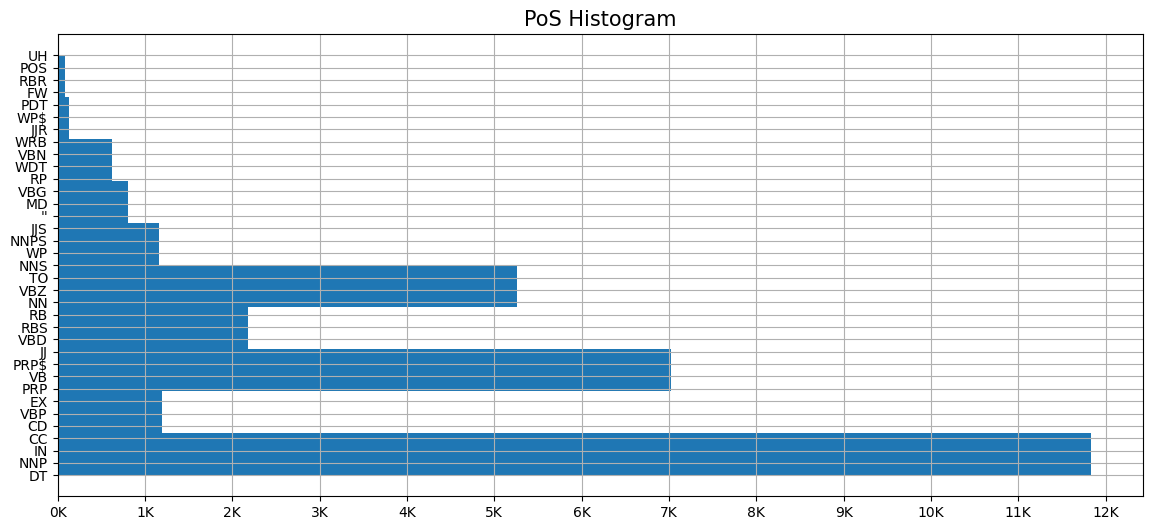

In [92]:
fig, ax = plt.subplots (figsize=(14, 6));
major_ticks = np.arange(0, 12001, 1000)
# minor_ticks = np.arange(0, 12001, 45)
ax.set_xticks(major_ticks)
# plt.xticks(minor_ticks, minor=True)
# plt.yticks(major_ticks)
# plt.yticks(minor_ticks, minor=True)

def thousands (x, pos):
    return '{:1.0f}K'.format(x*1e-3)

# And a corresponding grid
ax.grid(which='both')
ax.xaxis.set_major_formatter(thousands)
ax.hist (POS_hist, orientation="horizontal");
ax.set_title ("PoS Histogram", size= 15);

In [95]:
# 6 NER

named_entities = ne_chunk(pos_tags)
# print("Named Entities:", named_entities)

# Extract named entities as a list of tuples
def extract_named_entities(tree):
    entities = []
    for subtree in tree:
        if isinstance(subtree, Tree):
            entity = " ".join([word for word, tag in subtree.leaves()])
            entity_type = subtree.label()
            entities.append((entity, entity_type))
    return entities

entities = extract_named_entities(named_entities)
print(entities[:3])

[('Tragedie', 'ORGANIZATION'), ('Hamlet', 'GPE'), ('William Shakespeare Actus Primus Scoena Prima Enter Barnardo', 'PERSON')]


In [96]:
entities_hist = np.array ([k[1] for k in entities])

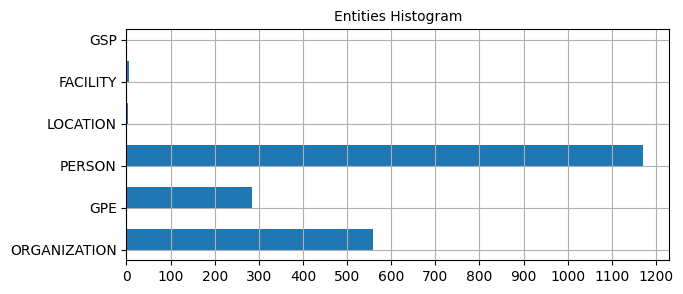

In [97]:
fig, ax = plt.subplots (figsize=(7, 3));
major_ticks = np.arange(0, 1501, 100)
ax.set_xticks(major_ticks)

# And a corresponding grid
ax.grid(which='both')
ax.hist (entities_hist, orientation="horizontal");
ax.set_title ("Entities Histogram", size= 10);

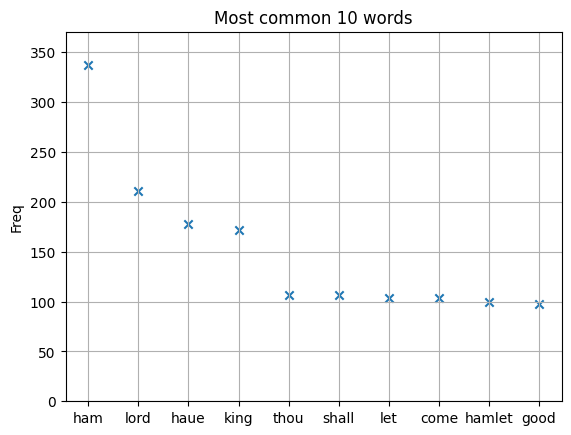

In [98]:
# 7

all_words = nltk.FreqDist(w.lower() for w in filtered_words) # frequency distribution object, counts the occurrence of each word

#sort
df = pd.DataFrame({"keys": all_words.keys(),
 "val": all_words.values()}).sort_values(by= ["val"], ascending= False)
plt.scatter (df.head(10)["keys"], df.head(10)["val"], marker="x");
plt.ylim (0, df["val"].max()*1.1);
major_ticks = np.arange(0, df["val"].max()*1.1, 50)
plt.yticks (major_ticks);
plt.grid(which='both');
plt.title ("Most common 10 words");
plt.ylabel ("Freq");


In [99]:
# Frequency of a specific word
specific_word = "hamlet"
print ("The word", str (specific_word), "has been found", all_words [specific_word], "times.")

The word hamlet has been found 100 times.
